In [1]:
setwd(here::here())

In [2]:
library("Matrix")
library("tidyverse")
library("metacell")

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x tidyr::unpack() masks Matrix::unpack()



In [3]:
scdb_init("scrna_db", force_reinit=T)
scfigs_init("figs/")

initializing scdb to scrna_db



In [11]:
mat_name = "elf5"

# The function below does not work properly. 

metadata = read.table(file = "data/list_of_elf5_plates.tsv",sep = "\t")

print("The following plates are missing/not sequenced yet:")
print(metadata$Plate[!(paste0(metadata$Plate,".txt") %in% list.files("data/umi.tables/"))])

metadata$Amp.Batch.ID = metadata$Plate
metadata$Seq.Batch.ID = metadata$Sequencing.Dates
metadata$Batch.Set.ID = metadata$Amp.Batch.ID

write.table(x = metadata,file = paste("config/key_",mat_name,".txt",sep = ""),quote = F,sep = "\t",row.names = F)

[1] "The following plates are missing/not sequenced yet:"
character(0)


In [12]:
mcell_import_multi_mars(mat_nm = mat_name,
                        dataset_table_fn = paste("config/key_",mat_name,".txt",sep = ""),
                        base_dir = "data/umi.tables/mars_seq/",
                        patch_cell_name=T,
                        force=TRUE)

will read elf5_sc_exp3_p1

will read elf5_sc_exp3_p2

will read elf5_sc_exp3_p3

will read elf5_sc_exp3_p4

will read elf5_sc_exp3_p5

will read elf5_sc_exp3_p6

will read elf5_sc_exp3_p7

will read elf5_sc_exp3_p8

will read elf5_sc_exp3_p9

will read p1_DB4GC_control_e1

will read p1_DB4GC_e5_exp6

will read p10_DB4GC_e1

will read p2_DB4GC_control_e1_cont

will read p2_DB4GC_e5b_exp6

will read p3_DB4GC_control_e1_b

will read p3_DB4GC_e5c_exp6

will read p4_DB4GC_control_e2

will read p4_DB4GC_e7_exp6

will read p5_DB4GC_control_e2b

will read p5_DB4GC_e7b_exp6

will read p6_DB4GC_control_e2c

will read p6_DB4GC_control_e4_exp6

will read p7_DB4GC_control_e3

will read p7_DB4GC_control_e4b_exp6

will read p7b_DB4GC_control_e4c_exp6

will read p8_DB4GC_control_e3b

will read p1_elf5_exp4_sg2_3

will read p2_elf5_exp4_sg2_3

will read p1_control_exp5_sg2_sg3

will read p11_DB4GC_e1b

will read p2_control_exp5_sg2_sg3

will read p3_elf5_exp5_sg2_sg3

will read elf5_sg2_sg3_exp6_p1

wi

[1] TRUE

In [13]:
mat = scdb_mat(mat_name)
nms = c(rownames(mat@mat), rownames(mat@ignore_gmat))
bad_genes = c(grep("ERCC", nms,v=T),"Neat1", "Xist", "Malat1", "AK140265","AK018753","AK163440","DQ539915","AK131586","AK131579","AK142750","X57780","GU332589","BC071253")

mat = scm_ignore_genes(scmat = mat,ig_genes = bad_genes)
message("The following genes were ignored")
print(bad_genes)

The following genes were ignored



  [1] "ERCC-00002" "ERCC-00003" "ERCC-00004" "ERCC-00009" "ERCC-00012"
  [6] "ERCC-00013" "ERCC-00014" "ERCC-00016" "ERCC-00017" "ERCC-00019"
 [11] "ERCC-00022" "ERCC-00024" "ERCC-00025" "ERCC-00028" "ERCC-00031"
 [16] "ERCC-00033" "ERCC-00034" "ERCC-00035" "ERCC-00039" "ERCC-00040"
 [21] "ERCC-00041" "ERCC-00042" "ERCC-00043" "ERCC-00044" "ERCC-00046"
 [26] "ERCC-00048" "ERCC-00051" "ERCC-00053" "ERCC-00054" "ERCC-00057"
 [31] "ERCC-00058" "ERCC-00059" "ERCC-00060" "ERCC-00061" "ERCC-00062"
 [36] "ERCC-00067" "ERCC-00069" "ERCC-00071" "ERCC-00073" "ERCC-00074"
 [41] "ERCC-00075" "ERCC-00076" "ERCC-00077" "ERCC-00078" "ERCC-00079"
 [46] "ERCC-00081" "ERCC-00083" "ERCC-00084" "ERCC-00085" "ERCC-00086"
 [51] "ERCC-00092" "ERCC-00095" "ERCC-00096" "ERCC-00097" "ERCC-00098"
 [56] "ERCC-00099" "ERCC-00104" "ERCC-00108" "ERCC-00109" "ERCC-00111"
 [61] "ERCC-00112" "ERCC-00113" "ERCC-00116" "ERCC-00117" "ERCC-00120"
 [66] "ERCC-00123" "ERCC-00126" "ERCC-00130" "ERCC-00131" "ERCC-00134"
 [71] 

5489 cells with <1500 UMIs

118 cells with >20000 UMIs



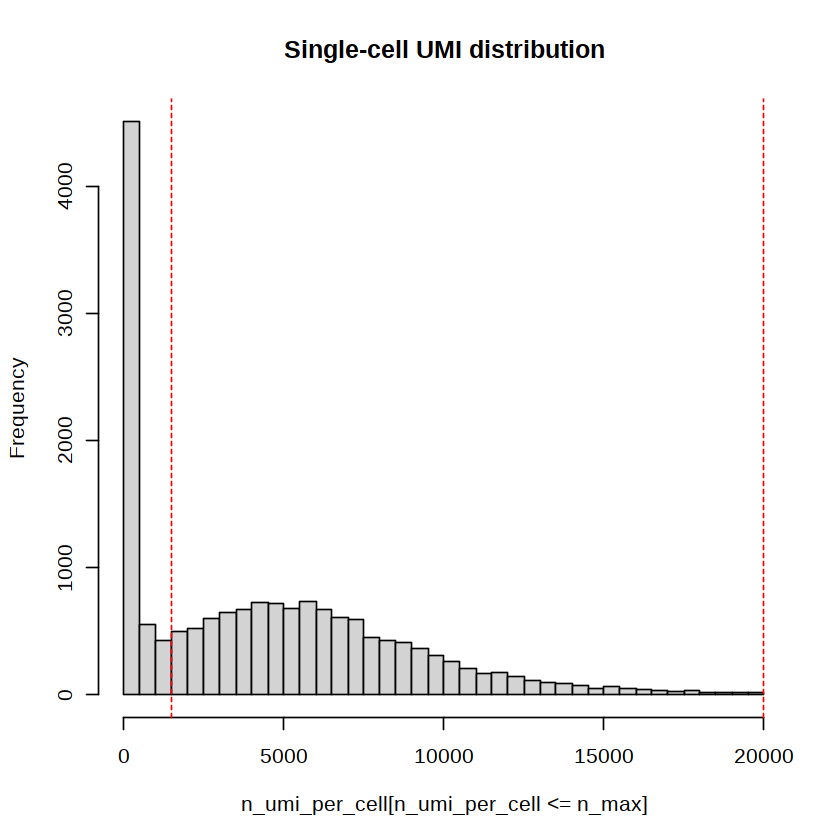

In [14]:
n_umi_per_cell = colSums(mat@mat)
n_min = 1500
n_max = 20000
hist(n_umi_per_cell[n_umi_per_cell <= n_max],breaks = seq(0,n_max,length.out = 41), main = "Single-cell UMI distribution")
abline(v = n_min,col = "red",lty = "dashed")
abline(v = n_max,col = "red",lty = "dashed")
message(paste0(sum(n_umi_per_cell < n_min), " cells with <",n_min," UMIs"))
message(paste0(sum(n_umi_per_cell > n_max), " cells with >",n_max," UMIs"))

[1] 13

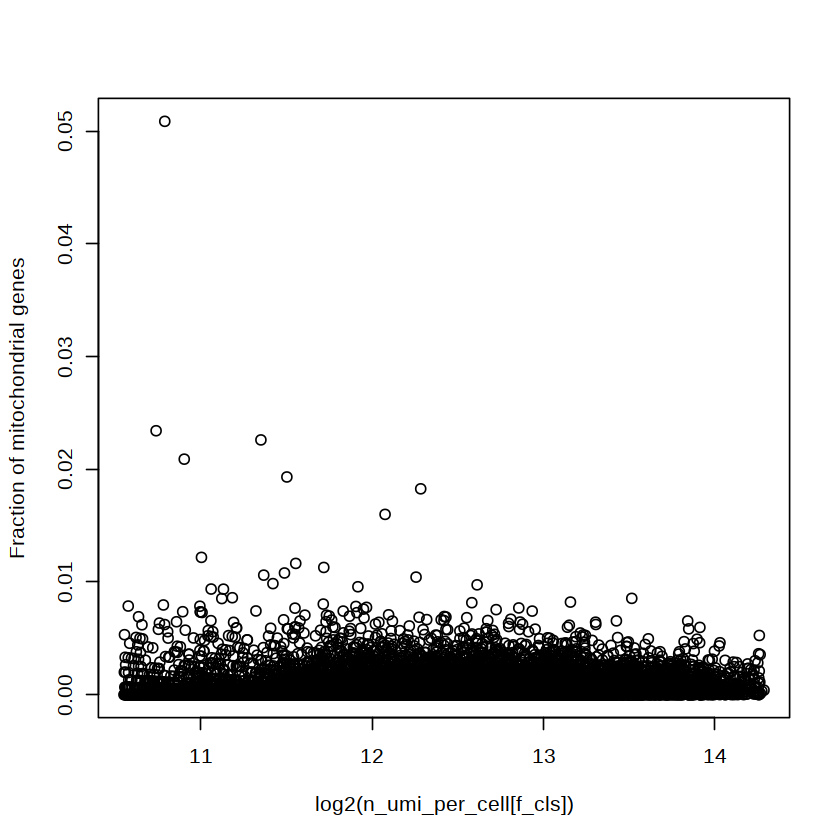

In [15]:
small_cells = colnames(mat@mat)[n_umi_per_cell < n_min]
large_cells = colnames(mat@mat)[n_umi_per_cell > n_max]

f_cls = n_umi_per_cell <= n_max & n_umi_per_cell >= n_min

fr_excl = colSums(mat@ignore_gmat)/colSums(mat@mat)

plot(x = log2(n_umi_per_cell[f_cls]),y = fr_excl[f_cls],ylab = "Fraction of mitochondrial genes")

sum(fr_excl[f_cls] > 0.01)

In [16]:
cells_large_fr = colnames(mat@mat)[fr_excl > 0.01]

mat = scm_ignore_cells(scmat = mat,ig_cells = unique(c(small_cells,large_cells,cells_large_fr)))
message(paste0("excluded ",length(unique(c(small_cells,large_cells,cells_large_fr)))," cells"))

excluded 5621 cells



In [17]:
files_with_metadata = list.files(path = "data/mars_seq_plate_metadata/")

files_with_metadata = intersect(files_with_metadata,paste(metadata$Plate,".tsv",sep=""))
files_with_metadata

extra_cell_metadata = data.frame()

for (plate_id in files_with_metadata) {
  print(plate_id)
  extra_cell_metadata_temp = read.table(paste("data/mars_seq_plate_metadata/",plate_id,sep = ""),
                                        sep = "\t",h = T,stringsAsFactors = F)
  colnames(extra_cell_metadata_temp)[colnames(extra_cell_metadata_temp) == "dtomato_a"] = "tdtomato_a"
  #extra_cell_metadata = rbind(extra_cell_metadata,extra_cell_metadata_temp,fill = TRUE)
  extra_cell_metadata = bind_rows(extra_cell_metadata,extra_cell_metadata_temp)
}

#Next I remove the duplicate cells
duplicate_cells = names(table(extra_cell_metadata$cell)[table(extra_cell_metadata$cell) >1])
tot_number_of_duplicates = sum(table(extra_cell_metadata$cell)[table(extra_cell_metadata$cell) >1]) - length(duplicate_cells)

message(tot_number_of_duplicates," wells with duplicated cells")

for (cell_id in duplicate_cells) {
  duplicates = which(extra_cell_metadata$cell == cell_id)
  # remove the first element from the duplicate list
  duplicates = duplicates[-1]
  extra_cell_metadata = extra_cell_metadata[-duplicates,]
}

# Next add metadata to matrix
extra_cell_metadata$cell = paste(extra_cell_metadata$plate,extra_cell_metadata$cell,sep=".")

temp = mat@cell_metadata
temp$cell = rownames(temp)
col_f = setdiff(colnames(temp),setdiff(colnames(extra_cell_metadata),c("cell")))
temp = temp[,col_f]



#temp$cell = names(temp$Plate)
temp = left_join(temp,extra_cell_metadata,by="cell")
rownames(temp) = temp$cell

message("In total ",sum(is.na(temp$embryo)), " nonannotated wells")
table(as.character(mat@cell_metadata$Plate[is.na(temp$embryo)]))

cls_f = temp$cell[!is.na(temp$embryo)]
f = temp[cls_f,"embryo"] == ""
temp[cls_f[f],"embryo"] = "empty"

[1] "elf5_sc_exp3_p1.tsv"            "elf5_sc_exp3_p2.tsv"           
 [3] "elf5_sc_exp3_p3.tsv"            "elf5_sc_exp3_p4.tsv"           
 [5] "elf5_sc_exp3_p5.tsv"            "elf5_sc_exp3_p6.tsv"           
 [7] "elf5_sc_exp3_p7.tsv"            "elf5_sc_exp3_p8.tsv"           
 [9] "elf5_sc_exp3_p9.tsv"            "elf5_sg2_sg3_exp6_p1.tsv"      
[11] "elf5_sg2_sg3_exp6_p2.tsv"       "elf5_sg2_sg3_exp6_p3.tsv"      
[13] "elf5_sg2_sg3_exp6_p4.tsv"       "elf5_sg2_sg3_exp6_p5.tsv"      
[15] "elf5_sg2_sg3_exp6_p6.tsv"       "p10_DB4GC_e1.tsv"              
[17] "p11_DB4GC_e1b.tsv"              "p1_DB4GC_control_e1.tsv"       
[19] "p1_DB4GC_e5_exp6.tsv"           "p1_control_exp5_sg2_sg3.tsv"   
[21] "p1_elf5_exp4_sg2_3.tsv"         "p1_elf5_sc_exp7_sg2_sg3.tsv"   
[23] "p1_elf5_sc_exp8_sg2_sg3.tsv"    "p2_DB4GC_control_e1_cont.tsv"  
[25] "p2_DB4GC_e5b_exp6.tsv"          "p2_control_exp5_sg2_sg3.tsv"   
[27] "p2_elf5_exp4_sg2_3.tsv"         "p2_elf5_sc_exp8_sg2_sg3.tsv"   
[29] "p3_DB4GC_control_e1_b.tsv"      "p3_DB4GC_e5c_exp6.tsv"         
[31] "p3_elf5_exp5_sg2_sg3.tsv"       "p3_elf5_sc_exp8_sg2_sg3.tsv"   
[33] "p4_DB4GC_control_e2.tsv"        "p4_DB4GC_e7_exp6.tsv"          
[35] "p4_elf5_sc_exp8_sg2_sg3.tsv"    "p5_DB4GC_control_e2b.tsv"      
[37] "p5_DB4GC_e7b_exp6.tsv"          "p5_elf5_sc_exp8_sg2_sg3.tsv"   
[39] "p6_DB4GC_control_e2c.tsv"       "p6_DB4GC_control_e4_exp6.tsv"  
[41] "p7_DB4GC_control_e3.tsv"        "p7_DB4GC_control_e4b_exp6.tsv" 
[43] "p7b_DB4GC_control_e4c_exp6.tsv" "p8_DB4GC_control_e3b.tsv"

[1] "elf5_sc_exp3_p1.tsv"
[1] "elf5_sc_exp3_p2.tsv"
[1] "elf5_sc_exp3_p3.tsv"
[1] "elf5_sc_exp3_p4.tsv"
[1] "elf5_sc_exp3_p5.tsv"
[1] "elf5_sc_exp3_p6.tsv"
[1] "elf5_sc_exp3_p7.tsv"
[1] "elf5_sc_exp3_p8.tsv"
[1] "elf5_sc_exp3_p9.tsv"
[1] "elf5_sg2_sg3_exp6_p1.tsv"
[1] "elf5_sg2_sg3_exp6_p2.tsv"
[1] "elf5_sg2_sg3_exp6_p3.tsv"
[1] "elf5_sg2_sg3_exp6_p4.tsv"
[1] "elf5_sg2_sg3_exp6_p5.tsv"
[1] "elf5_sg2_sg3_exp6_p6.tsv"
[1] "p10_DB4GC_e1.tsv"
[1] "p11_DB4GC_e1b.tsv"
[1] "p1_DB4GC_control_e1.tsv"
[1] "p1_DB4GC_e5_exp6.tsv"
[1] "p1_control_exp5_sg2_sg3.tsv"
[1] "p1_elf5_exp4_sg2_3.tsv"
[1] "p1_elf5_sc_exp7_sg2_sg3.tsv"
[1] "p1_elf5_sc_exp8_sg2_sg3.tsv"
[1] "p2_DB4GC_control_e1_cont.tsv"
[1] "p2_DB4GC_e5b_exp6.tsv"
[1] "p2_control_exp5_sg2_sg3.tsv"
[1] "p2_elf5_exp4_sg2_3.tsv"
[1] "p2_elf5_sc_exp8_sg2_sg3.tsv"
[1] "p3_DB4GC_control_e1_b.tsv"
[1] "p3_DB4GC_e5c_exp6.tsv"
[1] "p3_elf5_exp5_sg2_sg3.tsv"
[1] "p3_elf5_sc_exp8_sg2_sg3.tsv"
[1] "p4_DB4GC_control_e2.tsv"
[1] "p4_DB4GC_e7_exp6.tsv"
[1]

207 wells with duplicated cells

In total 0 nonannotated wells



< table of extent 0 >

In [18]:
mat@cell_metadata = temp

#cells_ignore_embryos = colnames(mat@mat)[mat@cell_metadata[colnames(mat@mat),"embryo"] %in% ignore_embryos]

new_ignore_cells = union(mat@ignore_cells,rownames(mat@cell_metadata)[mat@cell_metadata[,"embryo"]== "empty"])
new_ignore_cells = union(new_ignore_cells,duplicate_cells)
#new_ignore_cells = union(new_ignore_cells,cells_ignore_embryos)
mat = scm_ignore_cells(scmat = mat,ig_cells = new_ignore_cells)

In [19]:
scdb_add_mat(id = mat_name,mat = mat)

In [20]:
table(mat@cell_metadata[colnames(mat@mat),"embryo"])


    Control_m1_e1     Control_m1_e2     Control_m1_e3     Control_m1_e4 
              119                73                51               153 
     Control_m1e1      Control_m3e1          e1_DB4GC        e1_control 
              489               414               297              1030 
        e1b_DB4GC        e2_control        e3_control        e4_control 
              280               847               694              1016 
         e5_DB4GC          e7_DB4GC    elf5_exp4_m1e1    elf5_exp4_m1e2 
              978               407               132               121 
   elf5_exp4_m1e3    elf5_exp4_m1e4 elf5_exp5_KO_m1e1 elf5_exp6_KO_m1e1 
                9                82                 2               105 
elf5_exp6_KO_m1e3 elf5_exp6_KO_m1e5 elf5_exp6_KO_m2e1 elf5_exp6_KO_m2e3 
                1               120               193                85 
elf5_exp6_KO_m3e2 elf5_exp6_KO_m3e3 elf5_exp6_KO_m3e4 elf5_exp6_KO_m3e5 
               58               425               